# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

print(f"Beginning Data Retrieval \n-----------------------------")

for city in range(len(cities)):
    city_url = url + "appid=" + api_key + "&units=" + units + "&q="+ cities[city]
    response = requests.get(city_url)

    if response.ok == True: 
        if city <= 49:
            print(f"Processing Record {city+1} of Set 1 | {cities[city]}")
            city+=1
        else:
            print(f"Processing Record {city%50} of Set {int(city/50)+1} | {cities[city]}")
            city+=1
    else: 
        print(f"City not found. Skipping...")
    
print(f"-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | ontario
Processing Record 5 of Set 1 | nagato
Processing Record 6 of Set 1 | mackenzie
Processing Record 7 of Set 1 | cavan
Processing Record 8 of Set 1 | griffith
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | rabat
Processing Record 17 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | escanaba
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | sao joao da barra
Processing Record 23 of Set 1 | pathein
Processing Record 24 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = url + "appid=" + api_key + "&units=" + units + "&q="

data_list = []

for city in range(len(cities)):
    JSONContent = requests.get(query_url+cities[city])

    if JSONContent.ok == True: 
        data = JSONContent.json()
        data_list.append([cities[city],
                          data["clouds"]["all"],
                          data["sys"]["country"],
                          data["dt"],
                          data["main"]["humidity"],
                          data["coord"]["lat"],
                          data["coord"]["lon"],
                          data["main"]["temp_max"],
                          data["wind"]["speed"]])


dataset = pd.DataFrame(data_list)
dataset.columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
dataset.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [5]:
save_csv = dataset.to_csv("output_data/cities.csv")

In [6]:
dataset.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,82,NZ,1571550329,54,-46.19,168.86,59.00,10.00
1,rikitea,49,PF,1571550323,73,-23.12,-134.97,69.29,19.71
2,carnarvon,0,ZA,1571550420,18,-30.97,22.13,67.74,10.96
3,ontario,1,US,1571550572,52,34.07,-117.65,64.40,4.54
4,nagato,75,JP,1571550572,64,34.35,131.14,73.99,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/Allih/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


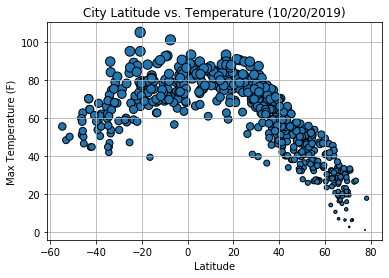

In [7]:
plt.scatter(dataset["Lat"],dataset["Max Temp"],s=dataset["Max Temp"],marker="o",edgecolors = "black")
date = time.strftime("%m/%d/%Y", time.gmtime(max(dataset["Date"])))
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/LatversusTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

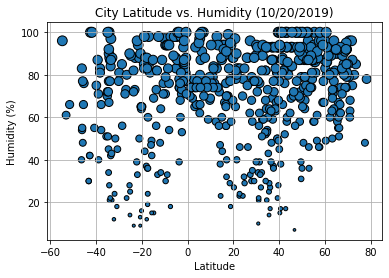

In [8]:
plt.scatter(dataset["Lat"],dataset["Humidity"],s=dataset["Humidity"],marker="o",edgecolors = "black")
date = time.strftime("%m/%d/%Y", time.gmtime(max(dataset["Date"])))
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/LatversusHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

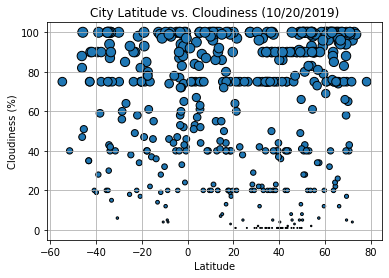

In [9]:
plt.scatter(dataset["Lat"],dataset["Cloudiness"],s=dataset["Cloudiness"],marker="o",edgecolors = "black")
date = time.strftime("%m/%d/%Y", time.gmtime(max(dataset["Date"])))
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/LatversusCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

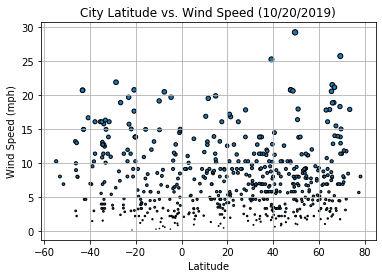

In [10]:
plt.scatter(dataset["Lat"],dataset["Wind Speed"],s=dataset["Wind Speed"],marker="o",edgecolors = "black")
date = time.strftime("%m/%d/%Y", time.gmtime(max(dataset["Date"])))
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/LatversusWindSpeed.png")
plt.show()